**Name:  TJ Zhang**

**Email: tjzhang@u.boisestate.edu**

### Set up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from census import Census
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Warmup: Correlation (10%)

Firstly, We create a generator. 

In [2]:
rng = np.random.default_rng(20211017)

And then make up the data, calculate their correlation coefficients for 1000 times.

In [3]:
corrs=[]
for i in range(1000):
    xs = pd.Series(rng.standard_normal(100))
    ys = pd.Series(rng.standard_normal(100))
    corrs.append(xs.corr(ys).item())

In [4]:
corrspd=pd.DataFrame({'corr':corrs})
corrspd['corr'].agg(['mean','var'])

mean    0.008673
var     0.009695
Name: corr, dtype: float64

Actually, the mean of the simulated coefficients is not 0 exactly and there is a very small variance during the simulation.

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='corr', ylabel='Density'>

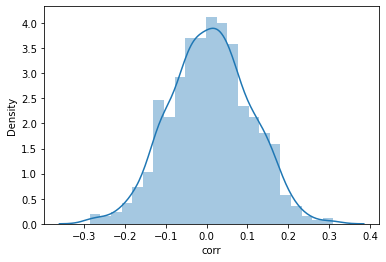

In [5]:
sns.distplot(corrspd['corr'])

My expection is that two independent variables' correlation should be zero. The mean of the simulated coefficients is not zero exactly, but it is very close to zero.  It is what I expect and I can accept.

In [6]:
corrs1=[]
for i in range(1000):
    xs = pd.Series(rng.standard_normal(1000))
    ys = pd.Series(rng.standard_normal(1000))
    corrs1.append(xs.corr(ys).item())

In [7]:
corrspd1=pd.DataFrame({'corr':corrs1})
corrspd1['corr'].agg(['mean','var'])

mean    0.000920
var     0.000942
Name: corr, dtype: float64

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='corr', ylabel='Density'>

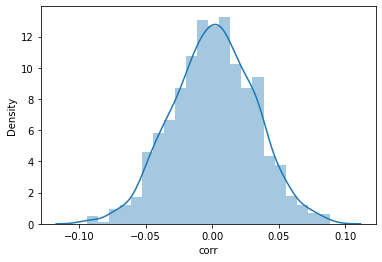

In [8]:
sns.distplot(corrspd1['corr'])

The mean and variance of the simulated coefficients is much closer to 0 with the increasing draws.

-----

In order to calculate the corr between X and Z, we define a corr_simulation(n=100) function to simulate. The parameter n means how many draws per iteration. the defalt is n=100.

In [9]:
def corr_simulation(n=100):
    corrs=[]
    for i in range(1000):
        xs = pd.Series(rng.standard_normal(n))
        ys = pd.Series(rng.standard_normal(n))
        zs = xs + ys
        corrs.append(xs.corr(zs).item())
    corrspds=pd.DataFrame({'corr':corrs})
    return corrspds['corr'].agg(['mean','var']),sns.distplot(corrspds['corr'])

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(mean    0.707628
 var     0.002460
 Name: corr, dtype: float64,
 <AxesSubplot:xlabel='corr', ylabel='Density'>)

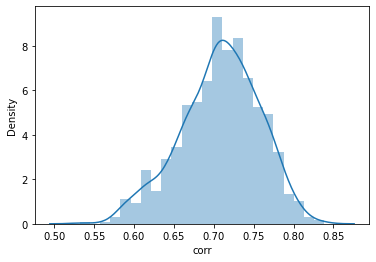

In [10]:
corr_simulation(100)

The mean of the correlation coefficients between xs and zs is very close to the analytic results 0.707.It is what I expect and I can accept.

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(mean    0.706653
 var     0.000253
 Name: corr, dtype: float64,
 <AxesSubplot:xlabel='corr', ylabel='Density'>)

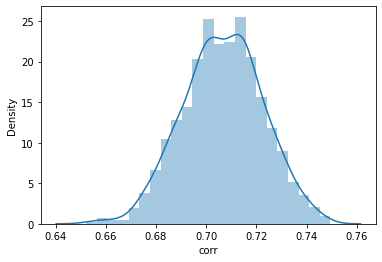

In [11]:
corr_simulation(1000)

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(mean    0.706825
 var     0.000026
 Name: corr, dtype: float64,
 <AxesSubplot:xlabel='corr', ylabel='Density'>)

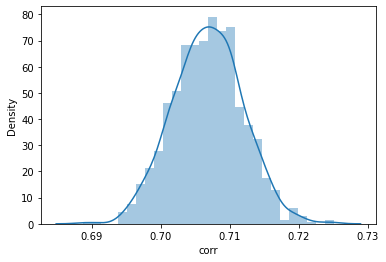

In [12]:
corr_simulation(10000)

The mean of the correlation coefficients between xs and zs is getting closer to the analytic results 0.707.

### Linear Regression (35%)

First generate the data.

In [13]:
xs = rng.standard_normal(1000)
errs = rng.standard_normal(1000)
ys = 0 + 1 * xs + errs
data = pd.DataFrame({
    'X': xs,
    'Y': ys,
    'errs':errs
})

In [14]:
data.head()

X         Y      errs
0  0.979166  1.647856  0.668689
1  2.247471  1.160399 -1.087072
2  0.464974  0.571609  0.106635
3  0.983795  0.671951 -0.311844
4 -0.424833 -1.257772 -0.832939

The intercept and slope of this linear model is shown below. The expected value is shown below. The result is  very close to what we expected. 

In [15]:
mod=smf.ols('Y~X',data=data)
mod.fit().params

Intercept    0.025537
X            1.002121
dtype: float64

The Rsquared is quite low because of the error. Rsquared should be 1 in this equation if the error is 0. It is not expected that the error is too big compared with X.

In [16]:
mod.fit().rsquared 

0.521271493191533

Let's check the model assumption.

In [17]:
def plot_lm_diag(fit):
    "Plot linear fit diagnostics"
    sns.regplot(x=fit.fittedvalues, y=fit.resid,line_kws={'color': 'orange'})
    plt.xlabel('Fitted')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted')
    plt.show()

    sm.qqplot(fit.resid, fit=True, line='45')
    plt.title('Residuals')
    plt.show()

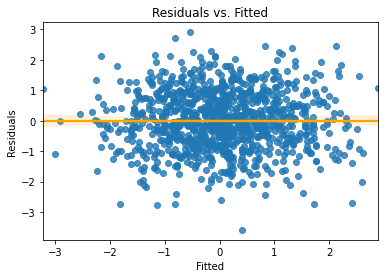

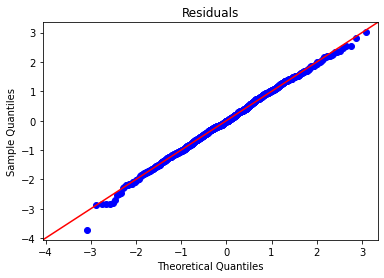

In [18]:
plot_lm_diag(mod.fit())

Model assumptions: hold

- Linearity: hold as ys = 0 + 1 * xs + errs it is an apperant linear relationship;
- Independence: hold as xs and errs are from different normal distribution, they are independent;
- Normal errors: hold as the QQ-plot shows linear means the errors are normal distributed;
- Equal variance: hold as the residuals vs. Fitted shows vertical positions look like random noise.

Thus, the main reason we didn't get the expected relationship between X and Y is that the error is too large.

Let us Repeat the simulation 1000 times, fitting a linear model each time. Show the mean, variance, and a distribution plot of the intercept, slope, and rsquare from these simulations.

we define a function linear_simulation(a=0,b=1) to simulate 1000 times.

In [19]:
def linear_simulation(a=0,b=1):
    intercepts=[]
    Xs=[]
    R2s=[]
    for i in range(1000):
        xs = rng.standard_normal(1000)
        errs = rng.standard_normal(1000)
        ys = a + b * xs + errs
        data = pd.DataFrame({
                    'X': xs,
                    'Y': ys,
                    'errs':errs
                    })
        mod=smf.ols('Y~X',data=data)
        intercepts.append(mod.fit().params['Intercept'])
        Xs.append(mod.fit().params['X'])
        R2s.append(mod.fit().rsquared)
    results=pd.DataFrame({'intercept':intercepts,'X':Xs,'R2':R2s})
    
    return results

In [20]:
simu1=linear_simulation(0,1)
simu1.head()

intercept         X        R2
0   0.028133  1.015791  0.545877
1  -0.015252  1.003452  0.492675
2  -0.025777  0.953628  0.469677
3  -0.012497  0.976700  0.501823
4  -0.016323  1.010740  0.504477

 The mean and variance of the intercept, slope, and rsquare from these simulation are shown below.

In [21]:
simu1.agg(['mean','var'])

intercept         X        R2
mean  -0.000114  0.999817  0.500233
var    0.000984  0.000972  0.000486

 The distribution plot of the intercept, slope, and rsquare from these simulation are shown below.

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

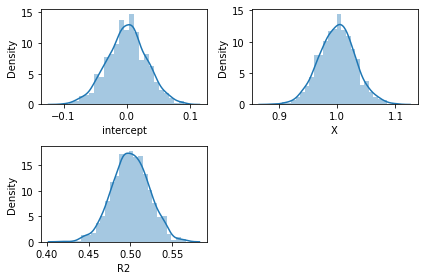

In [22]:
f0=plt.figure()
f0.add_subplot(2,2,1)
sns.distplot(simu1['intercept'])
f0.add_subplot(2,2,2)
sns.distplot(simu1['X'])
f0.add_subplot(2,2,3)
sns.distplot(simu1['R2'])
f0.tight_layout()

Fit a model to data with a=1 and b=4.

In [23]:
xs = rng.standard_normal(1000)
errs = rng.standard_normal(1000)
ys = 1 + 4 * xs + errs
data = pd.DataFrame({
    'X': xs,
    'Y': ys,
    'errs':errs
})

In [24]:
data.head()

X         Y      errs
0 -1.121652 -5.224204 -1.737595
1 -0.584324 -1.688731 -0.351436
2  1.136298  6.350547  0.805356
3  1.853144  7.940571 -0.472004
4 -2.806509 -7.300322  2.925715

In [25]:
mod=smf.ols('Y~X',data=data)
mod.fit().params

Intercept    1.076798
X            4.060260
dtype: float64

In [26]:
mod.fit().rsquared 

0.9443191255062964

actually, the result is  what we expected. and the rsquare is quite high.

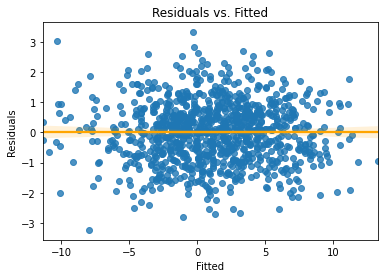

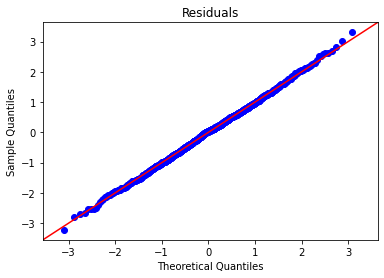

In [27]:
plot_lm_diag(mod.fit())

Model assumptions: hold

- Linearity: hold as ys = 1 + 4 * xs + errs it is an apperant linear relationship;
- Independence: hold as xs are  independent;
- Normal errors: hold as the QQ-plot shows linear means the errors are normal distributed;
- Equal variance: hold as the residuals vs. Fitted shows vertical positions look like random noise.

In [28]:
simu2=linear_simulation(1,4)

In [29]:
simu2.agg(['mean','var'])

intercept         X        R2
mean   0.999803  3.999325  0.941138
var    0.000995  0.000996  0.000014

The distributions of the slope, intercept, and rsquare if you do this 1000 times:

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

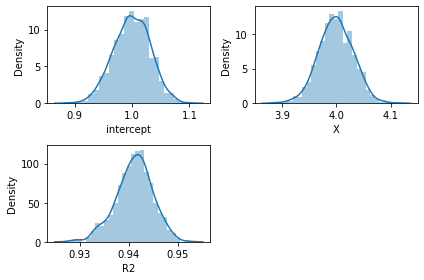

In [30]:
f0=plt.figure()
f0.add_subplot(2,2,1)
sns.distplot(simu2['intercept'])
f0.add_subplot(2,2,2)
sns.distplot(simu2['X'])
f0.add_subplot(2,2,3)
sns.distplot(simu2['R2'])
f0.tight_layout()

### Nonlinear Data (15%)

Generate the data firstly.

In [31]:
xs = rng.standard_normal(1000)
errs = rng.normal(0,5,1000)
ys = 10 + 5 * np.exp(xs) + errs
data = pd.DataFrame({
    'X': xs,
    'Y': ys,
    'errs':errs
})
data.head()

X          Y       errs
0 -0.985585  -0.670772 -12.536876
1  1.381109  30.339777   0.443221
2 -0.242251  21.266047   7.341752
3  0.848270  13.588794  -8.089216
4 -1.159633   7.962520  -3.605486

In [32]:
mod=smf.ols('Y~X',data=data)
mod.fit().params

Intercept    18.358252
X             8.278691
dtype: float64

In [33]:
mod.fit().rsquared 

0.49027539989509095

The model does fit well as the rsquare is quite low.

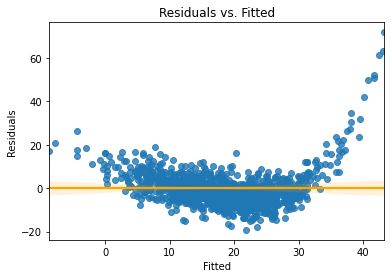

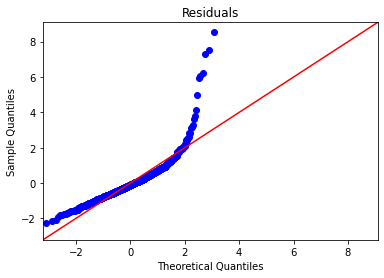

In [34]:
plot_lm_diag(mod.fit())

Model assumptions: Not hold

- Linearity: not hold as ys = 10 + 5 * np.exp(xs) + errss it is not an apperant linear relationship;
- Independence: hold as xs are independent;
- Normal errors: not hold as the QQ-plot does not show linear;
- Equal variance: not hold as the residuals vs. Fitted shows vertical positions do not look like random noise.

<AxesSubplot:xlabel='X', ylabel='Y'>

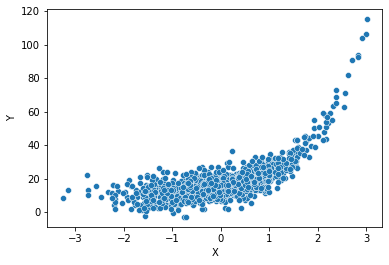

In [35]:
sns.scatterplot(x='X',y='Y',data=data)

generate the data firstly

In [36]:
xs = rng.standard_normal(1000)
errs = rng.normal(0,5,1000)
ys = -2 + 3 * np.power(xs,3) + errs
data = pd.DataFrame({
    'X': xs,
    'Y': ys,
    'errs':errs
})
data.head()

X         Y      errs
0 -1.437781 -7.653154  3.263452
1 -1.155720 -4.425586  2.205455
2  0.734609 -2.484113 -1.673408
3 -0.480905 -7.837749 -5.504093
4 -0.753912 -1.722712  1.562823

In [37]:
mod=smf.ols('Y~X',data=data)
mod.fit().params

Intercept   -1.653187
X            8.803121
dtype: float64

The model does fit well as the rsquare is quite low.

In [38]:
mod.fit().rsquared 

0.5311501152992428

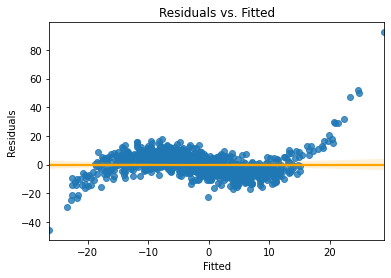

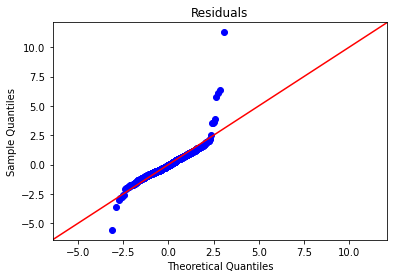

In [39]:
plot_lm_diag(mod.fit())

Model assumptions: Not hold

- Linearity: not hold as ys = -2 + 3 * np.power(xs,3) + errs it is not an apperant linear relationship;
- Independence: hold as xs are independent;
- Normal errors:  not hold as the QQ-plot does not show linear;
- Equal variance: not hold as the residuals vs. Fitted shows vertical positions do not look like random noise.

<AxesSubplot:xlabel='X', ylabel='Y'>

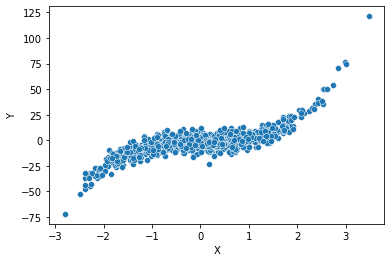

In [40]:
sns.scatterplot(x='X',y='Y',data=data)

### Non-Normal Covariates (15%)

Generate data.

In [41]:
xs = rng.gamma(2, 1, 1000)
errs = rng.standard_normal(1000)
ys = 10 + 0.3 *xs + errs
data = pd.DataFrame({
    'X': xs,
    'Y': ys,
    'errs':errs
})
data.head()

X          Y      errs
0  5.971047  11.773899 -0.017415
1  2.595007  10.997907  0.219404
2  0.680836  10.428360  0.224109
3  3.118447  10.108390 -0.827144
4  0.885574   9.490420 -0.775252

<AxesSubplot:xlabel='X', ylabel='Y'>

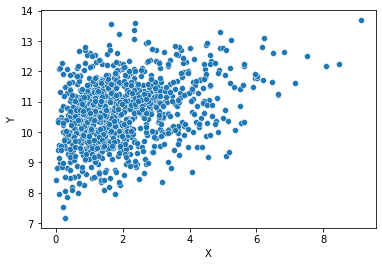

In [42]:
sns.scatterplot(x='X',y='Y',data=data)

In [43]:
mod=smf.ols('Y~X',data=data)
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     126.5
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.04e-27
Time:                        19:56:11   Log-Likelihood:                -1396.9
No. Observations:                1000   AIC:                             2798.
Df Residuals:                     998   BIC:                             2808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1363      0.055    184.330      0.000      10.028      10.244
X              0.2530      0.022     11.246      0.000       0.209       0.297
==============================================================================
Omnibus:                        1.508   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                1.556
Skew:                          -0.092   Prob(JB):                        0.459
Kurtosis:                       2.944   Cond. No.                         4.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

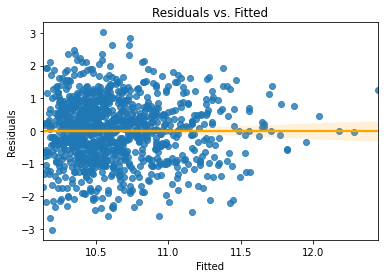

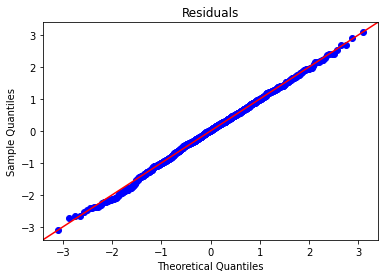

In [44]:
plot_lm_diag(mod.fit())

The model fit quite baddly because The Rsquire is vary low.

Model assumptions: Not hold

- Linearity: not hold from the scatter plot, it is not an linear relationship;
- Independence: hold as xs is from Gamma distribution, errors are from normal distribution, they are independent;
- Normal errors:   hold as the QQ-plot  shows linear;
- Equal variance: not hold as the residuals vs. Fitted shows vertical positions do not look like random noise.


Let's see the variance of parameters. we define a function non_normal_simulation() firstly.

In [45]:
def non_normal_simulation():
    intercepts=[]
    Xs=[]
    R2s=[]
    for i in range(1000):
        xs = rng.gamma(2, 1, 1000)
        errs = rng.standard_normal(1000)
        ys = 10 + 0.3 *xs + errs
        data = pd.DataFrame({
                    'X': xs,
                    'Y': ys,
                    'errs':errs
                    })
        mod=smf.ols('Y~X',data=data)
        intercepts.append(mod.fit().params['Intercept'])
        Xs.append(mod.fit().params['X'])
        R2s.append(mod.fit().rsquared)
    results=pd.DataFrame({'intercept':intercepts,'X':Xs,'R2':R2s})
    
    return results

In [46]:
non_normal_simulation().agg(['mean','var'])

intercept         X        R2
mean   9.996219  0.300917  0.154423
var    0.002889  0.000493  0.000480

It shows that the variance of the intercept X and R2 is very small.

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

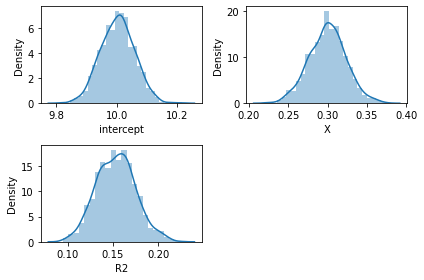

In [47]:
f0=plt.figure()
f0.add_subplot(2,2,1)
sns.distplot(non_normal_simulation()['intercept'])
f0.add_subplot(2,2,2)
sns.distplot(non_normal_simulation()['X'])
f0.add_subplot(2,2,3)
sns.distplot(non_normal_simulation()['R2'])
f0.tight_layout()

The linear regression are not appropriate to the data, because from the scatter plot, it is apparent not linear between X and Y. The R2 is very low. In addition, the model assumptions do not hold.

### Multiple Regression (10%)

Now we’re going to look at regression with two or more independent variables. First, we generate the data and form it to a dataframe.

In [48]:
x1s = rng.normal(10,2, 1000)
x2s = rng.normal(-2,5, 1000)
errs = rng.standard_normal(1000)
ys = 1 + 0.5 *x1s + 3*x2s + errs
data = pd.DataFrame({
    'X1': x1s,
    'X2': x2s,
    'Y': ys,
    'errs':errs
})
data.head()

X1        X2          Y      errs
0  10.226457 -0.505596   4.563564 -0.032875
1   9.584075  2.676596  12.858563 -0.963261
2  10.007517  4.378554  17.899492 -1.239929
3  11.013583 -5.171654  -7.403896  1.604273
4  10.964922  1.670016  11.210191 -0.282317

we simulate the relationship between Y and X1, X2. The OLS Regression Result is shown below.

In [49]:
mod=smf.ols('Y~X1+X2',data=data)
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.193e+05
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:56:30   Log-Likelihood:                -1417.0
No. Observations:                1000   AIC:                             2840.
Df Residuals:                     997   BIC:                             2855.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9984      0.166      6.025      0.000       0.673       1.324
X1             0.4955      0.016     30.711      0.000       0.464       0.527
X2             2.9936      0.006    487.059      0.000       2.981       3.006
==============================================================================
Omnibus:                        2.699   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                2.699
Skew:                          -0.068   Prob(JB):                        0.259
Kurtosis:                       3.216   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients of Intercept, X1 and X2 are 0.94,0.50,3.00 respectively. It is what we expected because our ture relationship is ys = 1 + 0.5 *x1s + 3*x2s + errs.

Now let's check the model assumptions

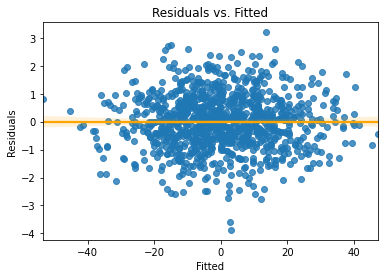

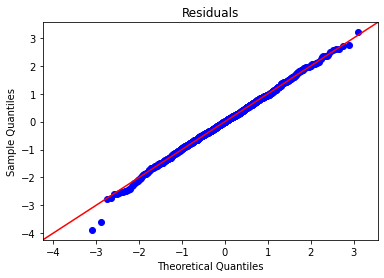

In [50]:
plot_lm_diag(mod.fit())

Model assumptions: hold

- Linearity: hold as ys = 1 + 0.5 *x1s + 3*x2s + errs, it is an linear relationship;
- Independence: hold as x1 and x2 are from different normal distribution, they are independent;
- Normal errors:   hold as the QQ-plot  shows  linear;
- Equal variance:  hold as the residuals vs. Fitted shows vertical positions look like random noise.


### Correlated Predictors (10%)

Now we’re going to see what happens when we have correlated predictor variables. Firstly, we generate the corelated X1 and X2, the covariance between X1 and X2 is 0.85. The errors are independent.

In [51]:
xs = rng.multivariate_normal([1, 3], [[1, 0.85], [0.85, 1]], 1000)
errs = rng.normal(0,2, 1000)
ys = 1 + 2 *xs[:,0] + 3*xs[:,1] + errs
data = pd.DataFrame({
    'X1': xs[:,0],
    'X2': xs[:,1],
    'Y': ys,
    'errs':errs
})
data.head()

X1        X2          Y      errs
0 -0.606967  1.123302   5.086322  1.930349
1  1.738060  2.873646  15.779944  2.682884
2  1.167251  3.251121  15.459024  2.371161
3  0.348219  2.276509  10.711653  2.185688
4  0.214760  2.095326   7.803848  0.088350

As the pairplot shown, X1, X2 and Y are all symmetric distributed. X1 and X2, X1 and Y, X2 and Y have linear relationship.

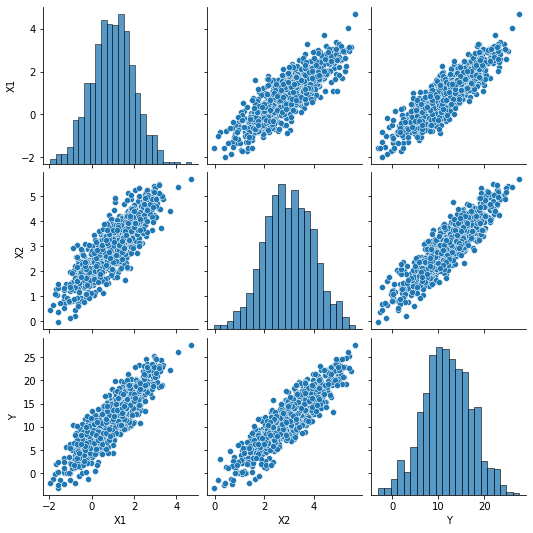

In [52]:
sns.pairplot(data[['X1','X2','Y']])

Let's fit the model between Y and X1+X2 to see their relationship. 

In [53]:
mod=smf.ols('Y~X1+X2',data=data)
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     3065.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:56:32   Log-Likelihood:                -2085.2
No. Observations:                1000   AIC:                             4176.
Df Residuals:                     997   BIC:                             4191.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8137      0.270      3.015      0.003       0.284       1.343
X1             1.9854      0.116     17.117      0.000       1.758       2.213
X2             3.0591      0.118     26.002      0.000       2.828       3.290
==============================================================================
Omnibus:                        3.145   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.038
Skew:                          -0.104   Prob(JB):                        0.219
Kurtosis:                       3.171   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The result shows that Y and X1+X2 has a good linear relationship as R2 is quite large. Now let's check it's model assumption.

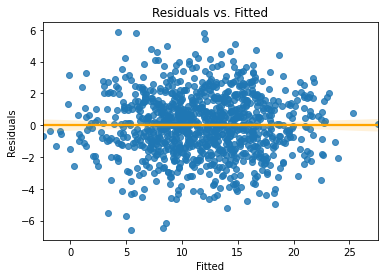

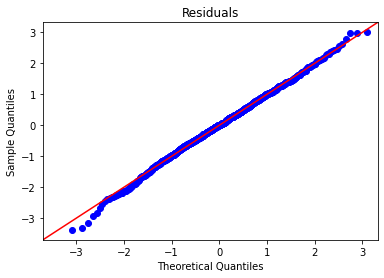

In [54]:
plot_lm_diag(mod.fit())

Model assumptions: Not hold

- Linearity: hold as ys = 1 + 2 *xs[:,0] + 3*xs[:,1] + errs, it is an linear relationship;
- Independence: not hold as x1 and x2 are not independent, they have a covariance of 0.85;
- Normal errors:   hold as the QQ-plot  shows  linear;
- Equal variance:  hold as the residuals vs. Fitted shows vertical positions look like random noise.


Then we run the simulation 100 times, the mean, variance, and appropriate distribution plots of the estimated intercepts and coefficients are shown below.

In [55]:
intercepts=[]
X1=[]
X2=[]
for i in range(100):
    xs = rng.multivariate_normal([1, 3], [[1, 0.85], [0.85, 1]], 1000)
    errs = rng.normal(0,2, 1000)
    ys = 1 + 2 *xs[:,0] + 3*xs[:,1] + errs
    data = pd.DataFrame({
                'X1': xs[:,0],
                'X2': xs[:,1],
                'Y': ys,
                'errs':errs
                })
    mod=smf.ols('Y~X1+X2',data=data)
    intercepts.append(mod.fit().params['Intercept'])
    #Ys.append(mod.fit().params['Y'])
    X1.append(mod.fit().params['X1'])
    X2.append(mod.fit().params['X2'])
    results=pd.DataFrame({'intercept':intercepts,'X1':X1,'X2':X2})

In [56]:
results.agg(['mean','var'])

intercept        X1        X2
mean   0.997277  1.999519  3.001687
var    0.074256  0.014168  0.013452

/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zhangtianjie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

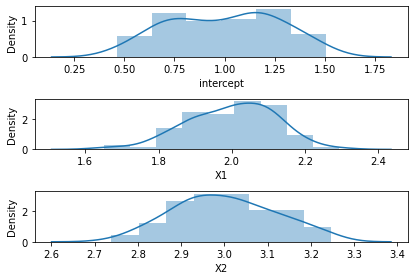

In [57]:
f0=plt.figure()
f0.add_subplot(3,1,1)
sns.distplot(results['intercept'])
f0.add_subplot(3,1,2)
sns.distplot(results['X1'])
f0.add_subplot(3,1,3)
sns.distplot(results['X2'])
f0.tight_layout()

In order to simulate the situation with different covariance between X1 and X2, We define a function simu_covar(covar), the parameter 'covar' is the covariance between X1 and X2.

In [58]:
def simu_covar(covar):
    intercepts=[]
    X1=[]
    X2=[]
    for i in range(100):
        xs = rng.multivariate_normal([1, 3], [[1, covar], [covar, 1]], 1000)
        errs = rng.normal(0,2, 1000)
        ys = 1 + 2 *xs[:,0] + 3*xs[:,1] + errs
        data = pd.DataFrame({
                    'X1': xs[:,0],
                    'X2': xs[:,1],
                    'Y': ys,
                    'errs':errs
                    })
        mod=smf.ols('Y~X1+X2',data=data)
        intercepts.append(mod.fit().params['Intercept'])
        #Ys.append(mod.fit().params['Y'])
        X1.append(mod.fit().params['X1'])
        X2.append(mod.fit().params['X2'])
    return pd.DataFrame({'intercept':intercepts,'X1':X1,'X2':X2})

We use a cov_list to contain the covariance (between X1 and X2) we want to study. we calculate the different result of coeffiances of intercept, X1 and X2 from different covariances (between X1 and X2). Finally, we put all the results in a dataframe.

In [59]:
varIntercept=[]
varX1=[]
varX2=[]
cov_list=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,0.999]
for real_cov in cov_list:
    varIntercept.append(simu_covar(real_cov)['intercept'].var())
    varX1.append(simu_covar(real_cov)['X1'].var())
    varX2.append(simu_covar(real_cov)['X2'].var())
data=pd.DataFrame({'COV between X1 and X2':cov_list,
                  'Variance of Intercept':varIntercept,
                   'Variance of X1':varX1,
                   'Variance of X2':varX2
                  })

In [60]:
data.head()

COV between X1 and X2  Variance of Intercept  Variance of X1  \
0                    0.0               0.041722        0.003259   
1                    0.1               0.043547        0.003783   
2                    0.2               0.048253        0.004684   
3                    0.3               0.040470        0.005434   
4                    0.4               0.039117        0.003750   

   Variance of X2  
0        0.003601  
1        0.003631  
2        0.004421  
3        0.004464  
4        0.003774

Then we create a plot of the coeffiances of intercept, X1 and X2 as we increase the covariances (between X1 and X2).

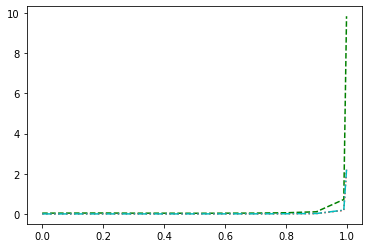

In [61]:
fig = plt.figure()
ax = plt.axes()
plt.plot(data['COV between X1 and X2'],data['Variance of Intercept'] , '--g')
plt.plot(data['COV between X1 and X2'],data['Variance of X1'] , ':r')
plt.plot(data['COV between X1 and X2'],data['Variance of X2'] , '-.c')
# solid green

### Reflection (5%)

We can make up data to study the behavior of sampling and statistic methods. With the increasing simulation times, the simulation results will be closer to some known parameters. pay attention to the Linear model assumption. Do not run a linear model, if the model is apparently non linear (judging by scatter plot); or, If the variables are not independent; or, the errors are not normal;or, the variance is not equal.

We can run simulation many times to calculate the variance, to make sure the reliability of our simulation.

We can gain insight into the linear regression, multilinear regression model and etc. we can understand what these models do with data through simulation.